<a href="https://colab.research.google.com/github/MuhammadShifa/Anamoly-Detection-Model-ADM-in-Health-Care-Insurance-/blob/main/HealthCare_ADM_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To access the drive data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Dataset

In [ ]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

# IMPORTING DATA

df = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')
df.head(10)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitDays,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead
0,PRV51001,0,20,0.0,7.0,1,1,1,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,80.0,0.0
1,PRV51001,0,700,0.0,7.0,1,1,0,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,67.0,0.0
2,PRV51001,0,900,0.0,7.0,2,1,0,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,76.0,0.0
3,PRV51001,0,500,0.0,7.0,1,1,0,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,74.0,0.0
4,PRV51001,0,36000,1068.0,5.0,1,1,0,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,69.0,0.0
5,PRV51001,0,12000,1068.0,3.0,1,1,0,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,72.0,0.0
6,PRV51001,0,70,0.0,7.0,1,1,0,12,12,1,1,2,2,2,2,2,1,1,2,2,5000,1068,370,70,91.0,0.0
7,PRV51001,0,100,0.0,7.0,2,2,0,12,12,2,1,1,2,2,2,2,2,1,2,2,0,0,320,80,90.0,0.0
8,PRV51001,0,300,0.0,7.0,2,2,1,12,12,1,1,1,2,1,2,1,1,2,2,2,0,0,630,130,57.0,0.0
9,PRV51001,0,60,0.0,7.0,2,2,1,12,12,2,1,1,2,1,1,1,1,2,2,2,0,0,1590,1070,98.0,0.0


#### Data Cleaning

In [ ]:
# print data information i,e no of columns and rows etc
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   PotentialFraud                   558211 non-null  int64  
 2   InscClaimAmtReimbursed           558211 non-null  int64  
 3   DeductibleAmtPaid                558211 non-null  float64
 4   AdmitDays                        558211 non-null  float64
 5   Gender                           558211 non-null  int64  
 6   Race                             558211 non-null  int64  
 7   RenalDiseaseIndicator            558211 non-null  int64  
 8   NoOfMonths_PartACov              558211 non-null  int64  
 9   NoOfMonths_PartBCov              558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [ ]:
# Check is there any null value
df.isnull().sum()

Provider                           0
PotentialFraud                     0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmitDays                          0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
IsDead                             0
d

In [ ]:
# Checking is there any duplicate rows
print("The shape of dataframe is: ",df.shape)
df = df.drop_duplicates(subset = None, )
print("The shape of dataframe after duplicate row: ", df.shape)

The shape of dataframe is:  (558211, 27)
The shape of dataframe after duplicate row:  (534843, 27)


#### Exploratory Data Analysis (EDA)

#### Dependent Variable

Exploratory data analysis was conducted started with the dependent variable, PotentialFraud in our case. There were 201403 frauds and 333440 non-frauds. 37.65% of the data were frauds while 62.34% were non-fraudulent claims. 

In [ ]:
# Count the occurence of Fraud/non-fraud 
occ = df['PotentialFraud'].value_counts()
print(occ)

# Length of total row/ observation
total_rows =len(df.index)
print(total_rows)

0    333440
1    201403
Name: PotentialFraud, dtype: int64
534843


In [ ]:
occ_0, occ_1 = occ
print("The occ of 0 is: ",occ_0)
print("The occ of 1 is: ",occ_1)

# Lets check the percentage of 0 and 1 in our dataset

percent_0 = (occ_0/total_rows) * 100
percent_1 = (occ_1/total_rows) * 100

print("The Percentage of 0 in dataset:",percent_0)
print("The Percentage of 1 in dataset", percent_1)

The occ of 0 is:  333440
The occ of 1 is:  201403
The Percentage of 0 in dataset: 62.34352884865279
The Percentage of 1 in dataset 37.65647115134721


In [ ]:
# For checking Imbalanced classification let's check the ratio of fraud and non-fraud
ratio_cases = occ/(len(df.index))
print(f'Ratio of non-farudulent cases: {ratio_cases[0]} \nRatio of fraudulent case: {ratio_cases[1]}')

Ratio of non-farudulent cases: 0.6234352884865278 
Ratio of fraudulent case: 0.37656471151347215


The above result of fradulent and non-fraudulent ratio shows that we an consider it as a balanced classification upto some extent. As we have not a lot imabalanced classifcation

#### Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


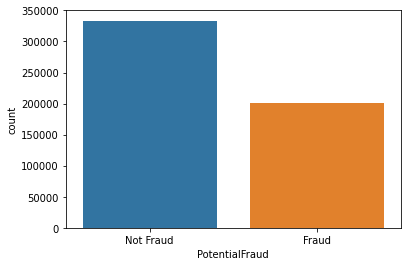

In [ ]:
# visualize the target variable i,e PotentialFraud here
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.countplot(df['PotentialFraud'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

#### Split the data

In [ ]:
X = df.drop(['Provider','PotentialFraud'], axis = 1).values
y = df['PotentialFraud'].values

# Split the data in train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Machine Learning Models
1 Decision Tree

2 K-Nearest Neighbors

3 Logistic Regression

4 Random Forest Tree

5 XGBoost


In [ ]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 5. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)


#### Evaluation of Accuracy and F1 Score

In [ ]:
# EVALUATION

# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.6347420930215165
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.6030319121089514
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.6345999955127103
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.6346897413077458
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.6353703135867654
------------------------------------------------------------------------
F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.1920627305662625
------------------------------------------------------------------------
F1 score of the KNN

#### Confusion Matrix for Above Model

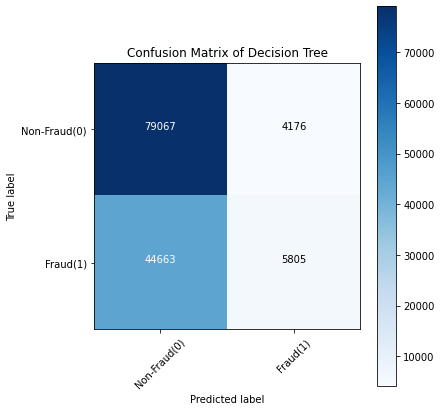

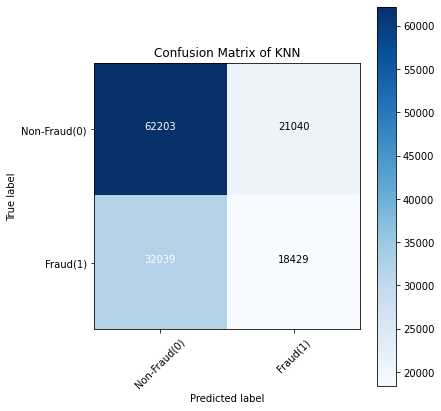

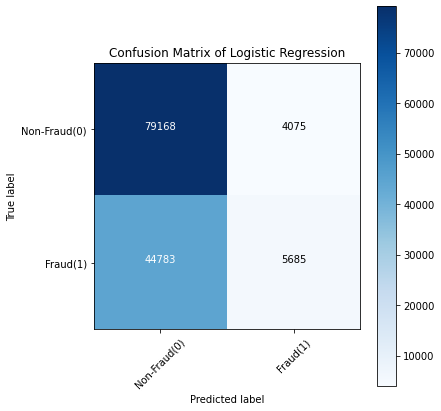

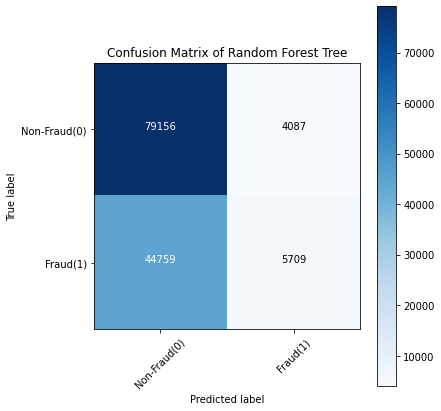

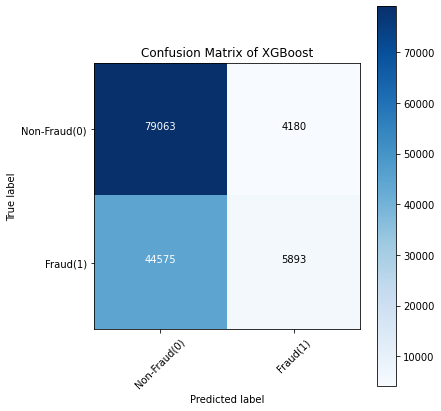

In [ ]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()


# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()


# 4. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 5. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()


